In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import gc
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.applications import NASNetMobile, DenseNet121, ResNet50

In [ ]:
train_path = os.path.join('/content/drive/My Drive/ARU/MajorProject')

In [ ]:
neg_images = os.listdir(train_path);
post_images = os.listdir(train_path + '/Positive');
neg_images_one = os.listdir(train_path + '/Negative');

In [ ]:
WIDTH = 224
HEIGHT = 224
CHANNEL = 3

In [ ]:
neg_df_one = { 'id': neg_images_one}
neg_df_one = pd.DataFrame(neg_df_one)
neg_df_one['label'] = 0;
print(neg_df_one)

                    id  label
0    1646599778299.jpg      0
1    1646600323435.jpg      0
2    1646601843777.jpg      0
3    1646601843802.jpg      0
4    1646601843826.jpg      0
..                 ...    ...
177  1649850247430.jpg      0
178  1649850247449.jpg      0
179  1649850247466.jpg      0
180  1649850247484.jpg      0
181  1649850247502.jpg      0

[182 rows x 2 columns]


In [ ]:
neg_ids_one = neg_df_one['id']
neg_labels_one = np.array(neg_df_one['label'])
neg_labels_one[:5]

array([0, 0, 0, 0, 0])

In [ ]:
neg_ids_one

0      1646599778299.jpg
1      1646600323435.jpg
2      1646601843777.jpg
3      1646601843802.jpg
4      1646601843826.jpg
             ...        
177    1649850247430.jpg
178    1649850247449.jpg
179    1649850247466.jpg
180    1649850247484.jpg
181    1649850247502.jpg
Name: id, Length: 182, dtype: object

In [ ]:
NUM_ITEMS_NEG_ONE = len(neg_df_one)
NUM_ITEMS_NEG_ONE

182

In [ ]:
# Building data list
data_neg_one = []
for i in range(NUM_ITEMS_NEG_ONE):
    image = Image.open(train_path + '/Negative/' + neg_ids_one[i])
    # resize the image and convert into numpy array (224, 224)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    data_neg_one.append(image)
data_neg_one = np.array(data_neg_one)

In [ ]:
len(data_neg_one)

182

In [ ]:
neg_df = { 'id': neg_images}
neg_df = pd.DataFrame(neg_df)
neg_df = neg_df[neg_df.id != 'Positive'];
neg_df = neg_df[neg_df.id != 'Negative'];
neg_df['label'] = 0;
print(neg_df)

                    id  label
0    1645546849850.jpg      0
1    1645546849863.jpg      0
2    1645546849877.jpg      0
3    1645546849894.jpg      0
4    1645546849940.jpg      0
..                 ...    ...
363  1646397063718.jpg      0
364  1646397063730.jpg      0
365  1646397063740.jpg      0
366  1646397063452.jpg      0
367  1646397063677.jpg      0

[368 rows x 2 columns]


In [ ]:
neg_ids = neg_df['id']
neg_labels = np.array(neg_df['label'])
neg_labels[:5]

array([0, 0, 0, 0, 0])

In [ ]:
post_df = { 'id': post_images}
post_df = pd.DataFrame(post_df)
post_df['label'] = 1;
print(post_df)

                    id  label
0    1646476113867.jpg      1
1    1646476113873.jpg      1
2    1646476113881.jpg      1
3    1646476113889.jpg      1
4    1646476113899.jpg      1
..                 ...    ...
295  1650442223359.jpg      1
296  1650442223408.jpg      1
297  1650442223453.jpg      1
298  1650442223503.jpg      1
299  1650442223549.jpg      1

[300 rows x 2 columns]


In [ ]:
post_ids = post_df['id']
post_labels = np.array(post_df['label'])
post_labels[:5]

array([1, 1, 1, 1, 1])

In [ ]:
NUM_ITEMS_NEG = len(neg_df)
NUM_ITEMS_NEG

368

In [ ]:
# Building data list
data_neg = []

for i in range(NUM_ITEMS_NEG):
    image = Image.open(train_path + '/' + neg_ids[i])
    # resize the image and convert into numpy array (224, 224)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    data_neg.append(image)
data_neg = np.array(data_neg)

In [ ]:
len(data_neg)

368

In [ ]:
NUM_ITEMS_POST = len(post_df)
NUM_ITEMS_POST

300

In [ ]:
# Building positive data list
post_data = []
for i in range(NUM_ITEMS_POST):
    image = Image.open(train_path + '/Positive/' + post_ids[i])
    # resize the image and convert into numpy array (224, 224)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    post_data.append(image)
post_data = np.array(post_data)

In [ ]:
len(post_data)

300

In [ ]:
data = np.concatenate((data_neg_one, data_neg, post_data))

In [ ]:
len(data)

850

In [ ]:
data.ndim

4

In [ ]:
frames = [neg_df_one, neg_df, post_df]
df = pd.concat(frames)
df

,id,label
0,1646599778299.jpg,0
1,1646600323435.jpg,0
2,1646601843777.jpg,0
3,1646601843802.jpg,0
4,1646601843826.jpg,0
...,...,...
295,1650442223359.jpg,1
296,1650442223408.jpg,1
297,1650442223453.jpg,1
298,1650442223503.jpg,1


In [ ]:
labels = df['label']

In [ ]:
print('Data: ', data.shape)
print('Labels: ', labels.shape)

Data:  (850, 224, 224, 3)
Labels:  (850,)


In [ ]:
# Splitting data set 
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)
# Scaling the data
X_train = X_train / 255
X_test = X_test / 255
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(680, 224, 224, 3) (170, 224, 224, 3) (680,) (170,)


In [ ]:
# labels

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test   = keras.utils.to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(680, 2)
(170, 2)


In [ ]:
gc.collect()

371

# Default CNN

## MODEL A

In [ ]:
# Building the Model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(HEIGHT, WIDTH, CHANNEL)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
opt = Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, epsilon=1e-08)
loss = keras.losses.BinaryCrossentropy(from_logits=True)

# Compiling the model
model.compile(
    loss=loss, 
    optimizer=opt, 
    metrics=['accuracy'])

In [ ]:
gc.collect()

251

In [ ]:
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 15)
checkpoint = ModelCheckpoint('my_model.h5', 
                             verbose=1, 
                             save_best_only=True)

history = model.fit(X_train, y_train, batch_size=30, epochs=100, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, monitor_val_acc])
#model.save('my_model.h5')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - ETA: 0s - loss: 0.6447 - accuracy: 0.6235
Epoch 1: val_loss improved from inf to 0.59996, saving model to my_model.h5
23/23 [==============================] - 11s 53ms/step - loss: 0.6447 - accuracy: 0.6235 - val_loss: 0.6000 - val_accuracy: 0.6647
Epoch 2/100
22/23 [===========================>..] - ETA: 0s - loss: 0.6042 - accuracy: 0.6909
Epoch 2: val_loss improved from 0.59996 to 0.58393, saving model to my_model.h5
23/23 [==============================] - 1s 39ms/step - loss: 0.6069 - accuracy: 0.6882 - val_loss: 0.5839 - val_accuracy: 0.7000
Epoch 3/100
22/23 [===========================>..] - ETA: 0s - loss: 0.5896 - accuracy: 0.7318
Epoch 3: val_loss did not improve from 0.58393
23/23 [==============================] - 1s 24ms/step - loss: 0.5905 - accuracy: 0.7309 - val_loss: 0.6546 - val_accuracy: 0.6765
Epoch 4/100
22/23 [===========================>..] - ETA: 0s - loss: 0.5749 - accuracy: 0.7485
Epoch 4: val_loss did not improve from

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 16ms/step - loss: 0.8247 - accuracy: 0.7529


[0.8247307538986206, 0.7529411911964417]

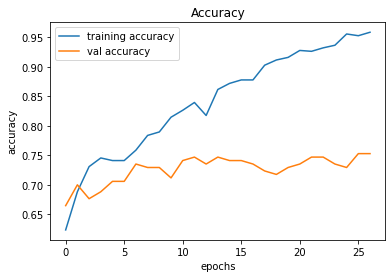

In [ ]:
# Plotting graph for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

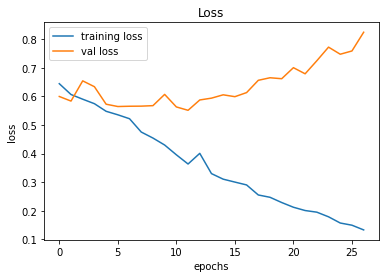

In [ ]:
# Plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(X_test)
X_preds = []
Y_preds = []
for i in range(20):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(y_test[i])
    Y_preds.append(y)
print(X_preds)
print(Y_preds)

[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data;', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 170 
accurately-predicted-data: 128 
wrongly-predicted-data:  42
Accuracy: 75.294 %


## MODEL B

In [ ]:
# Building the Model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(HEIGHT, WIDTH, CHANNEL)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
loss = keras.losses.BinaryCrossentropy(from_logits=True)

# Compiling the model
model.compile(
    loss=loss, 
    optimizer=opt, 
    metrics=['accuracy'])

In [ ]:
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 15)
checkpoint = ModelCheckpoint('my_model-SGD.h5', 
                             verbose=1, 
                             save_best_only=True)


history = model.fit(X_train, y_train, batch_size=50, epochs=100, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, monitor_val_acc])
#model.save('my_model-SGD.h5')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


13/14 [==========================>...] - ETA: 0s - loss: 0.6897 - accuracy: 0.5569
Epoch 1: val_loss improved from inf to 0.67766, saving model to my_model-SGD.h5
14/14 [==============================] - 2s 64ms/step - loss: 0.6895 - accuracy: 0.5647 - val_loss: 0.6777 - val_accuracy: 0.6647
Epoch 2/100
13/14 [==========================>...] - ETA: 0s - loss: 0.6717 - accuracy: 0.6523
Epoch 2: val_loss improved from 0.67766 to 0.65535, saving model to my_model-SGD.h5
14/14 [==============================] - 1s 53ms/step - loss: 0.6718 - accuracy: 0.6500 - val_loss: 0.6553 - val_accuracy: 0.6588
Epoch 3/100
13/14 [==========================>...] - ETA: 0s - loss: 0.6579 - accuracy: 0.6446
Epoch 3: val_loss improved from 0.65535 to 0.64077, saving model to my_model-SGD.h5
14/14 [==============================] - 1s 53ms/step - loss: 0.6577 - accuracy: 0.6441 - val_loss: 0.6408 - val_accuracy: 0.6588
Epoch 4/100
13/14 [==========================>...] - ETA: 0s - loss: 0.6464 - accuracy: 0

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 9ms/step - loss: 0.5742 - accuracy: 0.6941


[0.5741774439811707, 0.6941176652908325]

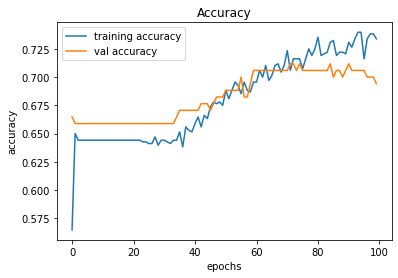

In [ ]:
# Plotting graph for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

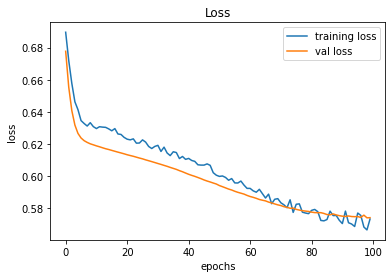

In [ ]:
# Plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(X_test)
X_preds = []
Y_preds = []
for i in range(30):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(y_test[i])
    Y_preds.append(y)
print('X_preds:', X_preds)
print('Y_preds:', Y_preds)

X_preds: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Y_preds: [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data;', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 170 
accurately-predicted-data: 118 
wrongly-predicted-data:  52
Accuracy: 69.412 %


# PRE-TRAINED MODELS

## MODEL C - NASNETMOBILE

In [ ]:
model_d = NASNetMobile(weights='imagenet', include_top=False, 
                       input_shape=(WIDTH, HEIGHT, CHANNEL)) 
x = model_d.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
preds = Dense(2, activation='softmax')(x)

20004864/19993432 [==============================] - 0s 0us/step


In [ ]:
# building the model
model = Model(inputs=model_d.input, outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 111, 111, 32  128         ['stem_conv1[0][0]']             
                                )                                                             

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
redlr = ReduceLROnPlateau(monitor='val_accuracy', 
                          factor=0.5,
                          patience=3, 
                          verbose=1, 
                          min_lr=1e-2)

checkpoint = ModelCheckpoint('model-nasnet.h5', 
                             verbose=1, 
                             save_best_only=True)
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 15)

In [ ]:
opt = Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, epsilon=1e-08)
loss = keras.losses.BinaryCrossentropy(from_logits=True)

# Compiling the model
model.compile(
    loss=loss, 
    optimizer=opt, 
    metrics=['accuracy'])

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range = 0.2, 
                             horizontal_flip=True, 
                             shear_range=0.2,
                             vertical_flip=True,
                             rotation_range=10,
                             fill_mode="nearest")
datagen.fit(X_train)
# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=50), 
                    epochs=100, 
                    callbacks=[redlr, checkpoint, monitor_val_acc], 
                    validation_data=(X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


22/22 [==============================] - ETA: 0s - loss: 0.9527 - accuracy: 0.5750
Epoch 1: val_loss improved from inf to 0.64533, saving model to model-nasnet.h5
22/22 [==============================] - 24s 512ms/step - loss: 0.9527 - accuracy: 0.5750 - val_loss: 0.6453 - val_accuracy: 0.7294 - lr: 1.0000e-04
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 0.8414 - accuracy: 0.6294
Epoch 2: val_loss improved from 0.64533 to 0.62229, saving model to model-nasnet.h5
22/22 [==============================] - 8s 345ms/step - loss: 0.8414 - accuracy: 0.6294 - val_loss: 0.6223 - val_accuracy: 0.7118 - lr: 1.0000e-04
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 0.7225 - accuracy: 0.7015
Epoch 3: val_loss improved from 0.62229 to 0.59637, saving model to model-nasnet.h5
22/22 [==============================] - 8s 347ms/step - loss: 0.7225 - accuracy: 0.7015 - val_loss: 0.5964 - val_accuracy: 0.7471 - lr: 1.0000e-04
Epoch 4/100
22/22 [===============

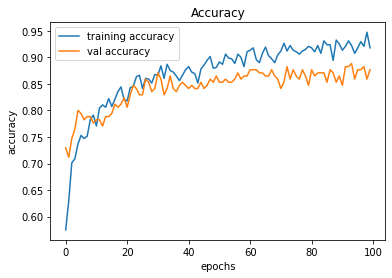

In [ ]:
# Plotting graph for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

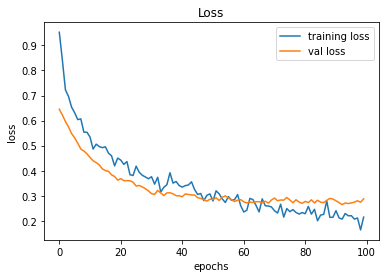

In [ ]:
# Plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model('model-nasnet.h5')
pred = model.predict(X_test)
X_preds = []
Y_preds = []
for i in range(30):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(y_test[i])
    Y_preds.append(y)
print(X_preds)
print(Y_preds)

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data;', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 170 
accurately-predicted-data: 150 
wrongly-predicted-data:  20
Accuracy: 88.235 %


## Model D - DENSENET121

In [ ]:
model_d = DenseNet121(weights='imagenet', include_top=False, input_shape=(WIDTH, HEIGHT, CHANNEL)) 
x = model_d.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x) 
x = Dense(512, activation='relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
preds=Dense(2, activation='softmax')(x)

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
model = Model(inputs=model_d.input, outputs=preds)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                           

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
redlr = ReduceLROnPlateau(monitor='val_accuracy', 
                          factor=0.5,
                          patience=5, 
                          verbose=1, 
                          min_lr=1e-2)

checkpoint = ModelCheckpoint('densenet-model.h5', 
                             verbose=1, 
                             save_best_only=True)
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 15)

In [ ]:
opt = Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, epsilon=1e-08)
loss = keras.losses.BinaryCrossentropy(from_logits=True)

# Compiling the model
model.compile(
    loss=loss, 
    optimizer=opt, 
    metrics=['accuracy'])

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range = 0.2, 
                             horizontal_flip=True, 
                             shear_range=0.2,
                             vertical_flip=True,
                             rotation_range=10,
                             fill_mode="nearest")
datagen.fit(X_train)
# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=50), 
                    epochs=100, 
                    callbacks=[redlr, checkpoint, monitor_val_acc], 
                    validation_data=(X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - ETA: 0s - loss: 1.0105 - accuracy: 0.5324
Epoch 1: val_loss improved from inf to 0.75950, saving model to densenet-model.h5
14/14 [==============================] - 15s 659ms/step - loss: 1.0105 - accuracy: 0.5324 - val_loss: 0.7595 - val_accuracy: 0.4412 - lr: 1.0000e-04
Epoch 2/100
14/14 [==============================] - ETA: 0s - loss: 0.8484 - accuracy: 0.6118
Epoch 2: val_loss improved from 0.75950 to 0.70884, saving model to densenet-model.h5
14/14 [==============================] - 7s 506ms/step - loss: 0.8484 - accuracy: 0.6118 - val_loss: 0.7088 - val_accuracy: 0.5059 - lr: 1.0000e-04
Epoch 3/100
14/14 [==============================] - ETA: 0s - loss: 0.7925 - accuracy: 0.6397
Epoch 3: val_loss improved from 0.70884 to 0.68417, saving model to densenet-model.h5
14/14 [==============================] - 7s 507ms/step - loss: 0.7925 - accuracy: 0.6397 - val_loss: 0.6842 - val_accuracy: 0.5353 - lr: 1.0000e-04
Epoch 4/100
14/14 [=========

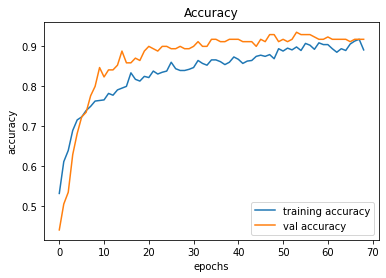

In [ ]:
# Plotting graph for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

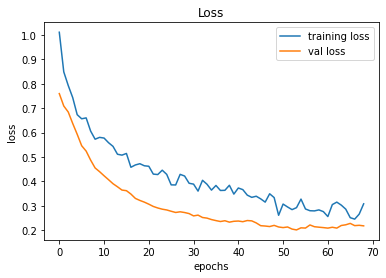

In [ ]:
# Plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model('densenet-model.h5')
pred = model.predict(X_test)
X_preds = []
Y_preds = []
for i in range(30):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(y_test[i])
    Y_preds.append(y)
print(X_preds)
print(Y_preds)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data;', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 170 
accurately-predicted-data: 159 
wrongly-predicted-data:  11
Accuracy: 93.529 %


## Model E - RESNET50

In [ ]:
model_d = ResNet50(weights='imagenet', include_top=False, input_shape=(WIDTH, HEIGHT, CHANNEL)) 
x = model_d.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x) 
x = Dense(512, activation='relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
preds=Dense(2, activation='softmax')(x)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model = Model(inputs=model_d.input, outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
redlr = ReduceLROnPlateau(monitor='val_accuracy', 
                          factor=0.5,
                          patience=5, 
                          verbose=1, 
                          min_lr=1e-2)

checkpoint = ModelCheckpoint('resnet50-model.h5', 
                             verbose=1, 
                             save_best_only=True)
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 15)

In [ ]:
opt = Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, epsilon=1e-08)
loss = keras.losses.BinaryCrossentropy(from_logits=True)

# Compiling the model
model.compile(
    loss=loss, 
    optimizer=opt, 
    metrics=['accuracy'])

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range = 0.2, 
                             horizontal_flip=True, 
                             shear_range=0.2,
                             vertical_flip=True,
                             rotation_range=10,
                             fill_mode="nearest")
datagen.fit(X_train)
# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=50), 
                    epochs=100, 
                    callbacks=[redlr, checkpoint, monitor_val_acc], 
                    validation_data=(X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - ETA: 0s - loss: 0.9452 - accuracy: 0.5412
Epoch 1: val_loss improved from inf to 0.86393, saving model to resnet50-model.h5
14/14 [==============================] - 14s 653ms/step - loss: 0.9452 - accuracy: 0.5412 - val_loss: 0.8639 - val_accuracy: 0.3412 - lr: 1.0000e-04
Epoch 2/100
14/14 [==============================] - ETA: 0s - loss: 0.8738 - accuracy: 0.6147
Epoch 2: val_loss improved from 0.86393 to 0.85324, saving model to resnet50-model.h5
14/14 [==============================] - 8s 576ms/step - loss: 0.8738 - accuracy: 0.6147 - val_loss: 0.8532 - val_accuracy: 0.3412 - lr: 1.0000e-04
Epoch 3/100
14/14 [==============================] - ETA: 0s - loss: 0.8507 - accuracy: 0.6456
Epoch 3: val_loss improved from 0.85324 to 0.78415, saving model to resnet50-model.h5
14/14 [==============================] - 8s 580ms/step - loss: 0.8507 - accuracy: 0.6456 - val_loss: 0.7841 - val_accuracy: 0.3412 - lr: 1.0000e-04
Epoch 4/100
14/14 [=========

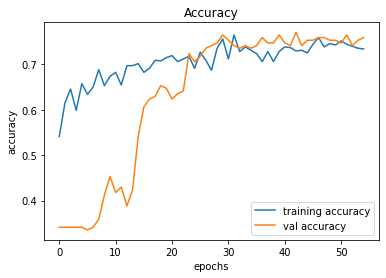

In [ ]:
# Plotting graph for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

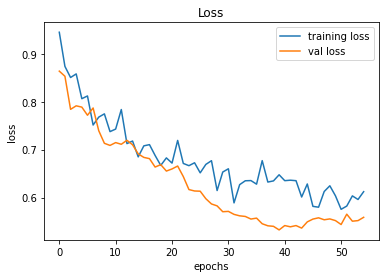

In [ ]:
# Plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(X_test)
X_preds = []
Y_preds = []
for i in range(30):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(y_test[i])
    Y_preds.append(y)
print(X_preds)
print(Y_preds)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data;', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 170 
accurately-predicted-data: 129 
wrongly-predicted-data:  41
Accuracy: 75.882 %


## Test the models with test dataset

In [ ]:
test_path = os.path.join('/content/drive/My Drive/ARU/testDataset')

In [ ]:
train_neg_images = os.listdir(test_path + '/Negative/');
train_post_images = os.listdir(test_path + '/Positive/');

In [ ]:
neg_images = {'filename': train_neg_images}
neg_images = pd.DataFrame(neg_images)
neg_filename = neg_images['filename']

post_images = {'filename': train_post_images}
post_images = pd.DataFrame(post_images)
post_filename = post_images['filename']

In [ ]:
NUM_NEG_IMAGES = len(neg_images)
print(NUM_NEG_IMAGES)

50


In [ ]:
NUM_POST_IMAGES = len(post_images)
print(NUM_POST_IMAGES)

50


In [ ]:
# Building data list
test_negative = []
neg_label = []
for i in range(NUM_NEG_IMAGES):
    image = Image.open(test_path + '/Negative/' + neg_filename[i])
    # resize the image and convert into numpy array (224, 224)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    test_negative.append(image)
    neg_label.append(0)

In [ ]:
# Building data list
test_positive = []
post_label = []
for i in range(NUM_POST_IMAGES):
    image = Image.open(test_path + '/Positive/' + post_filename[i])
    # resize the image and convert into numpy array (224, 224)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    test_positive.append(image)
    post_label.append(1)

In [ ]:
test_X = np.array(test_negative + test_positive)
test_X = test_X / 255

In [ ]:
len(test_X)

100

In [ ]:
test_y = np.array(neg_label + post_label)

In [ ]:
RANGE = len(test_X)
RANGE

100

In [ ]:
test_y = keras.utils.to_categorical(test_y)

## Model A

In [ ]:
model = tf.keras.models.load_model('my_model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 65 
wrongly-predicted-data:  35
Accuracy: 65.0 %


tf.Tensor(
[[38 12]
 [23 27]], shape=(2, 2), dtype=int32)


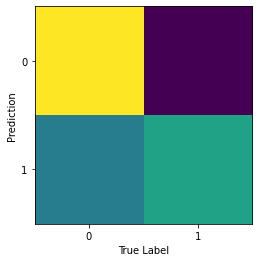

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model B

In [ ]:
model = tf.keras.models.load_model('my_model-SGD.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 55 
wrongly-predicted-data:  45
Accuracy: 55.0 %


tf.Tensor(
[[43  7]
 [38 12]], shape=(2, 2), dtype=int32)


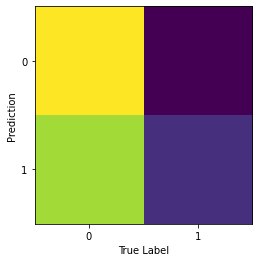

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model C - NASNET

In [ ]:
model = tf.keras.models.load_model('model-nasnet.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 79 
wrongly-predicted-data:  21
Accuracy: 79.0 %


tf.Tensor(
[[40 10]
 [11 39]], shape=(2, 2), dtype=int32)


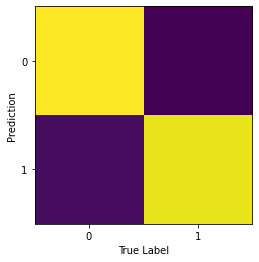

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model D - DENSENET

In [ ]:
model = tf.keras.models.load_model('densenet-model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 79 
wrongly-predicted-data:  21
Accuracy: 79.0 %


tf.Tensor(
[[38 12]
 [ 9 41]], shape=(2, 2), dtype=int32)


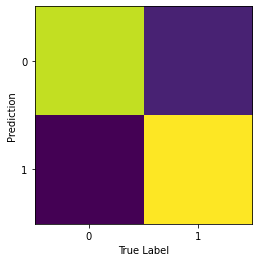

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model E

In [ ]:
model = tf.keras.models.load_model('resnet50-model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 56 
wrongly-predicted-data:  44
Accuracy: 56.0 %


tf.Tensor(
[[36 14]
 [30 20]], shape=(2, 2), dtype=int32)


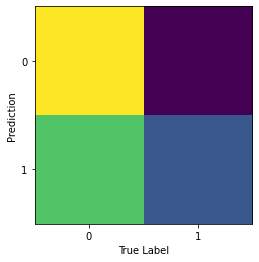

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

# Test the models with fake image dataset

In [ ]:
train_neg_images = os.listdir(test_path + '/Negative-GAN/');
train_post_images = os.listdir(test_path + '/Positive-GAN/');

In [ ]:
neg_images = {'filename': train_neg_images}
neg_images = pd.DataFrame(neg_images)
neg_filename = neg_images['filename']

post_images = {'filename': train_post_images}
post_images = pd.DataFrame(post_images)
post_filename = post_images['filename']

In [ ]:
NUM_NEG_IMAGES = len(neg_images)
print(NUM_NEG_IMAGES)

50


In [ ]:
NUM_POST_IMAGES = len(post_images)
print(NUM_POST_IMAGES)

50


In [ ]:
# Building data list
test_negative = []
neg_label = []
for i in range(NUM_NEG_IMAGES):
    image = Image.open(test_path + '/Negative-GAN/' + neg_filename[i])
    # resize the image and convert into numpy array (224, 224)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    test_negative.append(image)
    neg_label.append(0)

In [ ]:
# Building data list
test_positive = []
post_label = []
for i in range(NUM_POST_IMAGES):
    image = Image.open(test_path + '/Positive-GAN/' + post_filename[i])
    # resize the image and convert into numpy array (224, 224)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    test_positive.append(image)
    post_label.append(1)

In [ ]:
test_X = np.array(test_negative + test_positive)
test_X = test_X / 255
print(len(test_X))

test_y = np.array(neg_label + post_label)

RANGE = len(test_X)
print(RANGE)

test_y = keras.utils.to_categorical(test_y)

100
100


## Model A

In [ ]:
model = tf.keras.models.load_model('my_model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 63 
wrongly-predicted-data:  37
Accuracy: 63.0 %


tf.Tensor(
[[16 34]
 [ 3 47]], shape=(2, 2), dtype=int32)


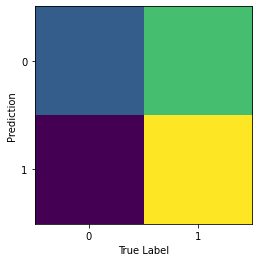

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model B

In [ ]:
model = tf.keras.models.load_model('my_model-SGD.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 65 
wrongly-predicted-data:  35
Accuracy: 65.0 %


tf.Tensor(
[[45  5]
 [30 20]], shape=(2, 2), dtype=int32)


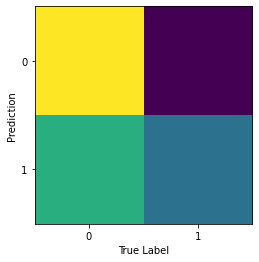

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model - D - DENSENET

In [ ]:
model = tf.keras.models.load_model('densenet-model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 77 
wrongly-predicted-data:  23
Accuracy: 77.0 %


tf.Tensor(
[[39 11]
 [12 38]], shape=(2, 2), dtype=int32)


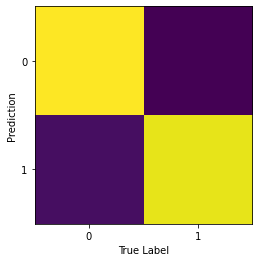

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model C - NASNET

In [ ]:
model = tf.keras.models.load_model('model-nasnet.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 67 
wrongly-predicted-data:  33
Accuracy: 67.0 %


tf.Tensor(
[[33 17]
 [16 34]], shape=(2, 2), dtype=int32)


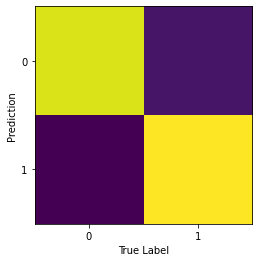

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model E

In [ ]:
model = tf.keras.models.load_model('resnet50-model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

tf.Tensor(
[[29 21]
 [14 36]], shape=(2, 2), dtype=int32)


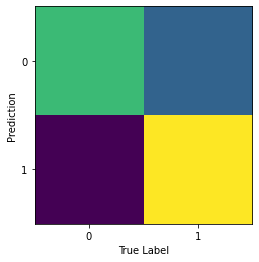

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()